# 1. Introducción



En la presente práctica se realizará un estudio de la evolución de la música a lo largo de los años empleando un dataset de unos 3Mb que contiene información de la plataforma musical en streaming Spotify.

El dataset seleccionado contiene un total de 30.000 canciones.

Esta información está extraída a partir de la API de Spotify y descargada a partir de un dataset publicado en Kaggle.

Los campos con los que se cuenta para realizar el presente análisis son los siguientes:

- track_id
- track_name
- track_artist
- track_popularity
- track_album_id
- track_album_name
- track_album_release_date
- playlist_name
- playlist_id
- playlist_genre
- playlist_subgenre
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- tempo
- duration_ms

Con esta información trataremos de hacer un repaso a la evolución de los gustos musicales a lo largo de los años. Este análisis se hará empleando el lenguaje de programación Python y las librerías de visualización de datos Matplotlib y plotly principalmente.

In [1]:
# Librerías
import pandas as pd
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Carga de datos inicial

# Cambiamos el nombre de las columnas para mejorar su usabilidad
columns = {'track_popularity':'Popularidad', 
           'track_id':'id', 
           'track_name':'Nombre', 
           'track_album_name': 'Album', 
           'track_album_release_date':'Año', 
           'playlist_genre': 'Género', 
           'playlist_subgenre': 'Subgénero',  
           'danceability':'Danzabilidad', 
           'energy':'Energía',
           'loudness':'Volumen', 
           'speechiness':'Cantado',
           'acousticness':'Acústica', 
           'instrumentalness':'Instrumentalidad', 
           'liveness':'Directo',
           'valence':'Positividad', 
           'tempo':'Ritmo',
           'duration_ms': 'Duración'}

df = pd.read_csv('/kaggle/input/30000-spotify-songs/spotify_songs.csv', usecols=columns.keys())

# Renombramos las columnas
df.rename(columns=columns, inplace=True)
#df = data_c.sort_values(by='popularidad', ascending=False)

# Se convierte la duración a segundos
df['Duración'] = df['Duración']/1000

# Pasamos el campo año a datetime
df['Año'] = pd.to_datetime(df['Año'], errors='coerce').dt.year

# 2. ¿Que tendencias podemos encontrar?

En primer lugar, sería interesante visualizar las tendencias respecto al género de las canciones a lo largo de los años. Los géneros musicales han ido cambiando a lo largo de las generaciones.

Estas tendencias ¿cambian búruscamente o poco a poco?

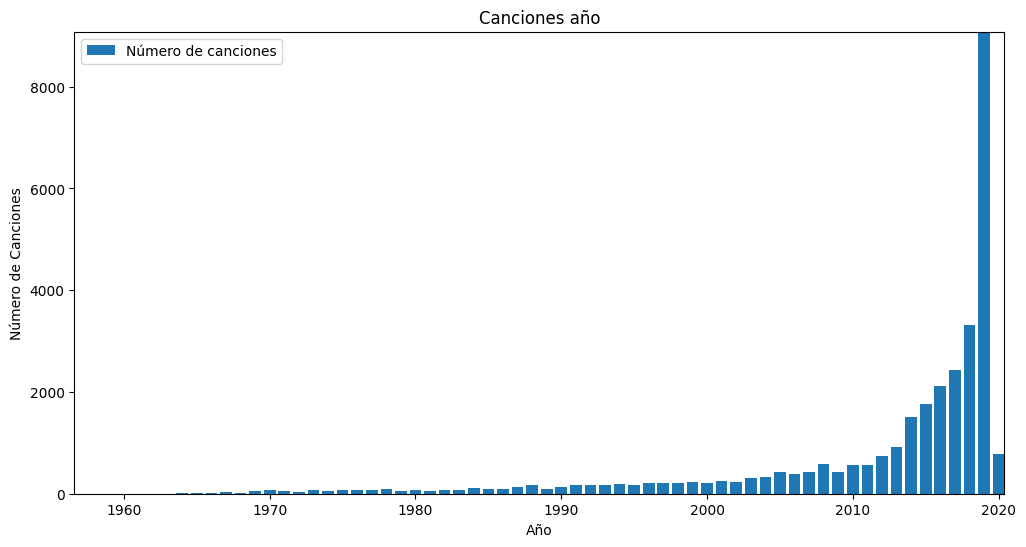

In [3]:
data = df.groupby(['Año'])['id'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(x='Año', height='id', data=data, label='Número de canciones')
plt.title('Canciones año')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')
plt.legend()
plt.margins(0,0)
plt.show()

Se observa como el número de canciones que componen el dataset es creciente a medida que se acerca a la época actual. Si lo observamos por género se puede ver de la siguiente forma:



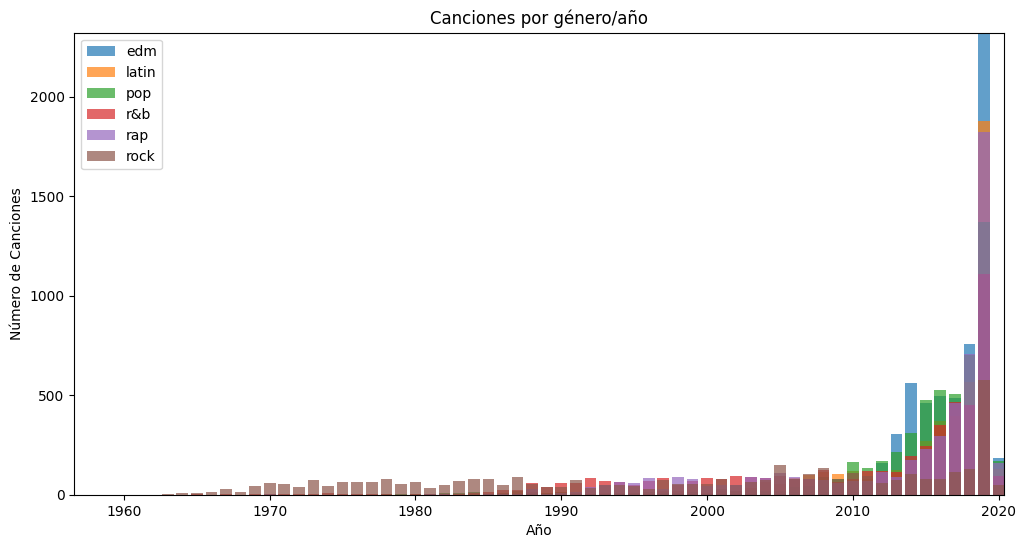

In [4]:
# Análisis de géneros por fecha
data = df.groupby(['Año', 'Género'])['id'].count().reset_index(name='id')

# Generamos el barplot segun el número de items
plt.figure(figsize=(12, 6))
for genre, group in data.groupby('Género'):
    plt.bar(group['Año'], group['id'], label=genre, alpha=0.7)
plt.legend()
plt.title('Canciones por género/año')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')
plt.margins(0,0)
plt.show()

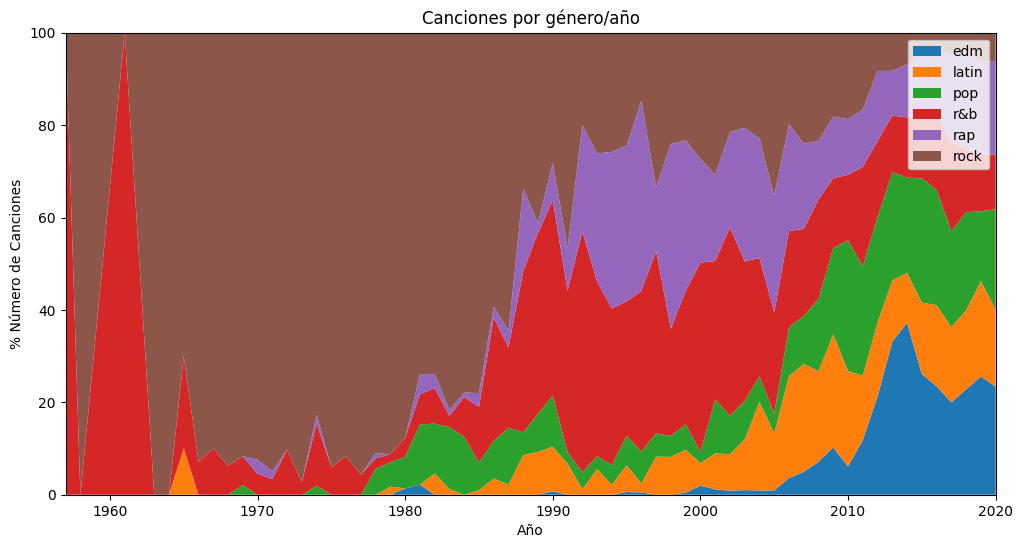

In [5]:
# Análisis de géneros por fecha
genero_año = df.groupby(['Año', 'Género']).size().reset_index(name='Canciones')

pivot_data = genero_año.pivot(index='Año', columns='Género', values='Canciones').fillna(0)
data = pivot_data.divide(pivot_data.sum(axis=1), axis=0) 

# Generamos el stackplot segun el número de items
plt.figure(figsize=(12, 6))
plt.stackplot(data.index, data.T * 100, labels=data.columns)
plt.legend()
plt.title('Canciones por género/año')
plt.xlabel('Año')
plt.ylabel('% Número de Canciones')
plt.margins(0,0)
plt.show()

En una primera visualización, se observa como a partir de mediados de los 80, el mercado está prácticamente dominado por el rock, con una fuerte subida del r&b que se mantiene hasta mediados de los 2000. A partir de ahí, los diferentes géneros musicales tiene una presencia más o menos equitativa, destacando hoy en día géneros como el edm, latina y pop.

A continuación, vamos a analizar la evolución de otros parámetros como son la energía de la música, popularidad, instrumentalidad, entre otros.

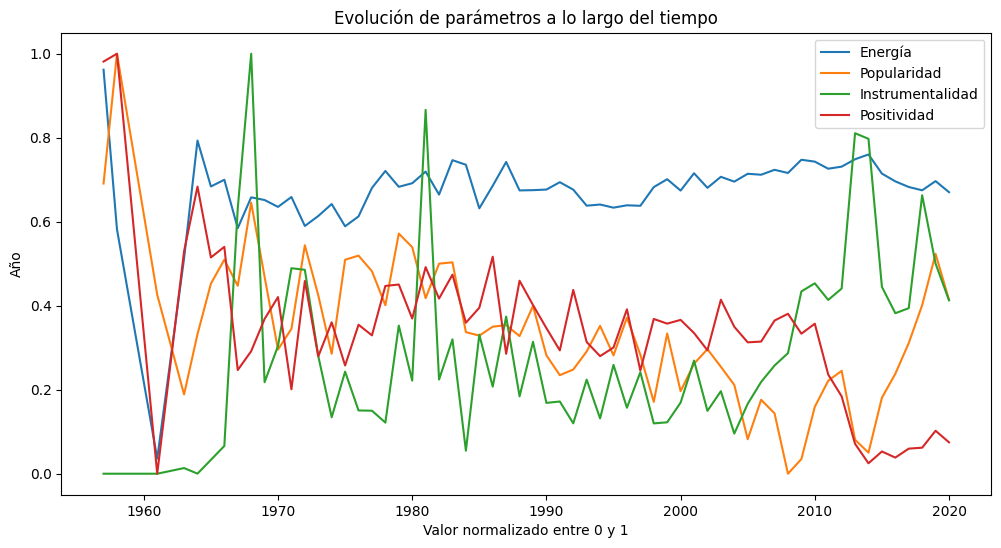

In [6]:
scaler = MinMaxScaler()

# Energía
energia = df.groupby(['Año'])['Energía'].mean().reset_index()

# Popularidad
popularidad = df.groupby(['Año'])['Popularidad'].mean().reset_index()
popularidad['Popularidad'] = scaler.fit_transform(np.array(popularidad['Popularidad']).reshape(-1, 1))

# Instrumentalidad
instrumentalidad = df.groupby(['Año'])['Instrumentalidad'].mean().reset_index()
instrumentalidad['Instrumentalidad'] = scaler.fit_transform(np.array(instrumentalidad['Instrumentalidad']).reshape(-1, 1))

# Positividad
positividad = df.groupby(['Año'])['Positividad'].mean().reset_index()
positividad['Positividad'] = scaler.fit_transform(np.array(positividad['Positividad']).reshape(-1, 1))

plt.figure(figsize=(12, 6))

plt.plot(energia['Año'], energia['Energía'], label='Energía')
plt.plot(popularidad['Año'], popularidad['Popularidad'], label='Popularidad')
plt.plot(instrumentalidad['Año'], instrumentalidad['Instrumentalidad'], label='Instrumentalidad')
plt.plot(positividad['Año'], positividad['Positividad'], label='Positividad')

plt.legend()
plt.title('Evolución de parámetros a lo largo del tiempo')
plt.ylabel('Año')
plt.xlabel('Valor normalizado entre 0 y 1')

plt.show()

En la anterior visualización se han valorado métricas como la energía, la popularidad, instrumentalidad y positividad de las canciones de media en su evolución a lo largo del tiempo. De ahí se extrae información que permite sacar alguna conclusión.

Algunos datos relevantes son que la energía de las canciones se ha mantenido estable a lo largo del tiempo. Por otro lado, se observa como la popularidad media de las canciones es descendiente hasta mediados de los 2010 al igual que su positividad, pero en este último caso, obteniendo en los últimos años sus valores más bajos.

Finalmente, en cuanto a la instrumentalidad de las canciones analizadas, se observa una tendencia más o menos constante con algunos picos en los 60 y 80, así como un repunte desde 2015 hasta la actualidad.

# 3. ¿Que hace que una canción sea popular?

Algo que tiene el dataset, son un montón de parámetros que medir en las canciones que contiene. Por eso, vamos a analizar que afecta a la popularidad de las canciones y su evolución a lo largo de los años.

A continuación profundizaremos en el análisis de la popularidad mediante otro stackplot para determinar como ha evolucionado este parámetro por cada género musical.

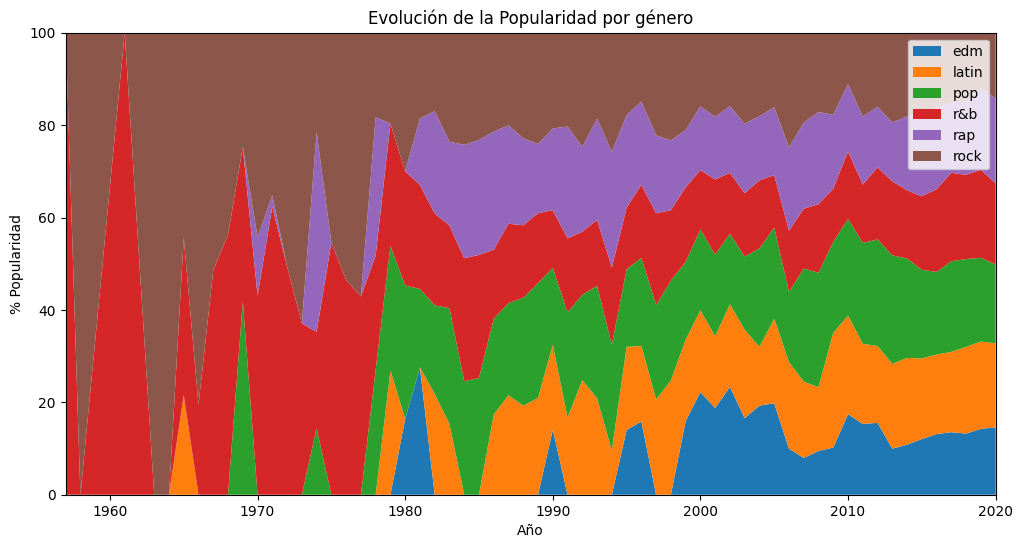

In [7]:
# Preparamos los datos por energía
genero_año_en = df.groupby(['Año', 'Género'])['Popularidad'].mean().reset_index()
pivot_data = genero_año_en.pivot(index='Año', columns='Género', values='Popularidad').fillna(0)
data = pivot_data.divide(pivot_data.sum(axis=1), axis=0)

# Generamos el stackplot segun el número de items
plt.figure(figsize=(12, 6))
plt.stackplot(data.index, data.T * 100, labels=data.columns)
plt.legend()
plt.title('Evolución de la Popularidad por género')
plt.xlabel('Año')
plt.ylabel('% Popularidad')
plt.margins(0,0)
plt.show()

A continuación crearemos una matriz de correlación para determinar cuales de los parámetros que contiene el dataset afecta en mayor medida a la popularidad de las canciones.

In [8]:
corr = df[['Popularidad',
          'Danzabilidad',
          'Energía',
          'Volumen', 
          'Cantado', 
          'Acústica', 
          'Instrumentalidad', 
          'Directo', 
          'Positividad', 
          'Ritmo',
          'Duración']].corr()

corr = corr[['Popularidad']].drop(index='Popularidad') # Solo vemos correlacion con popularidad  

# Matriz de correlación
fig = px.imshow(corr.sort_values(by='Popularidad', 
                                 ascending=False), 
                aspect="auto", 
                color_continuous_scale='Gnbu', 
                labels=dict(color="Nivel de popularidad"),
                zmin=-1,
                zmax=1)
fig.update_layout(title="¿Cuanto afecta cada variable a la popularidad?")
fig.show()

Tras observar la relación entre los diferentes parámetros y la popularidad de las canciones, se aprecia como ninguno de estos parámetros está demasiado relacionado con la popularidad de las canciones. Si bien la instrumentalidad o la duración presentan cierta correlación negativa, lo cual puede tener sentido ya que hoy en día se perciben las canciones cantadas como más populares, lo cual también se ve indicado por la presencia del parámetro Acústica en el top 1 de la correalación visualizada.

También destacar que la duración de las canciones está inversamente relacionada con su popularidad, siendo penalizadas aquellas canciones con duraciones altas.

# 4. Conclusiones

En el presente trabajo se ha realizado un camino visual sobre un dataset de canciones de spotify en el cual hemos aprendido algunas cosas sobre su evolución a lo largo de los años. Resulta interesando comprobar como en los últimos años nuevos géneros se han abierto paso y como los diferentes parámetros de las canciones como su positividad, energía, instrumentalidad o popularidad media han cambiado.

Por otro lado, también se ha observado como la popularidad de las canciones está relacionada en cierta medida con algunos parámetros como la instrumentalidad de las canciones, así como su duración.